In [5]:
import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()

In [29]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
## Split into train, validation, and test sets

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation='relu', input_shape=X_train_scaled.shape[1:]))
model.add(keras.layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='sgd')

In [18]:
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid_scaled, y_valid))
mse_test = model.evaluate(X_test_scaled, y_test)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.1824 - val_loss: 0.5502
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4710 - val_loss: 0.4438
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3971 - val_loss: 0.4362
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3742 - val_loss: 0.4296
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4268 - val_loss: 0.4145
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3661 - val_loss: 0.4054
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3813 - val_loss: 0.3983
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3689 - val_loss: 0.3958
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3679 - val_loss: 0.3911
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3831 - val_loss: 0.3955

In [19]:
X_new = X_test_scaled[:3]
y_pred = model.predict(X_new)
print('Actual -')
print(y_test[:3])
print('Prediction -')
print(y_pred)

Actual -
[1.625 0.732 2.681]
Prediction -
[[1.9899209]
 [1.1758789]
 [2.8362966]]


## Building a wide and deep neural network for California housing problem

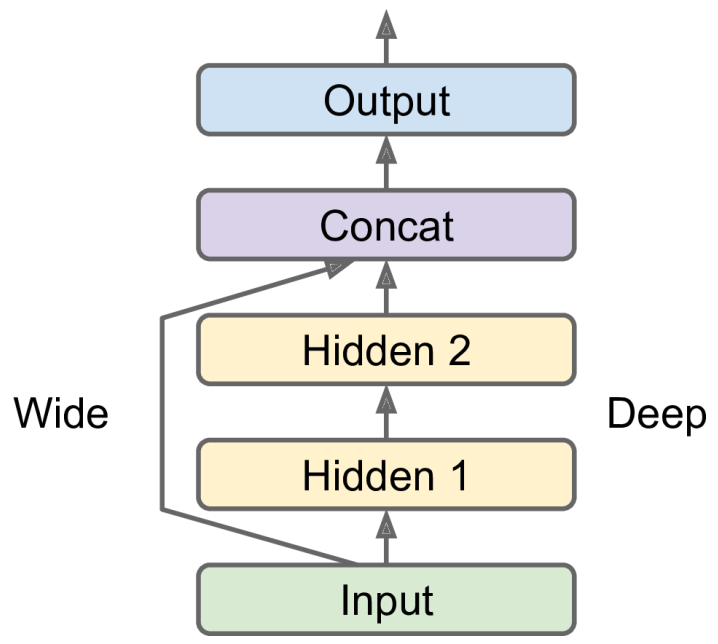

In [20]:
input = keras.layers.Input(shape=X_train_scaled.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input)  ## creating a dense layer and passing it the input as a function
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])  ##concat input and output of second layer
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

model.compile(loss='mean_squared_error', optimizer='sgd')

In [21]:
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid_scaled, y_valid))
mse_test = model.evaluate(X_test_scaled, y_test)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.9608 - val_loss: 0.4626
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4481 - val_loss: 0.4357
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3874 - val_loss: 0.4443
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3739 - val_loss: 0.4117
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3636 - val_loss: 0.4107
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3676 - val_loss: 0.4079
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4365 - val_loss: 0.4000
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3443 - val_loss: 0.3940
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3301 - val_loss: 0.3915
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3407 - val_loss: 0.3816

In [22]:
X_new = X_test_scaled[:3]
y_pred = model.predict(X_new)
print('Actual -')
print(y_test[:3])
print('Prediction -')
print(y_pred)

Actual -
[1.625 0.732 2.681]
Prediction -
[[2.1682904]
 [1.0899571]
 [2.8042011]]


## Another version of wide and deep neural network for California housing problem

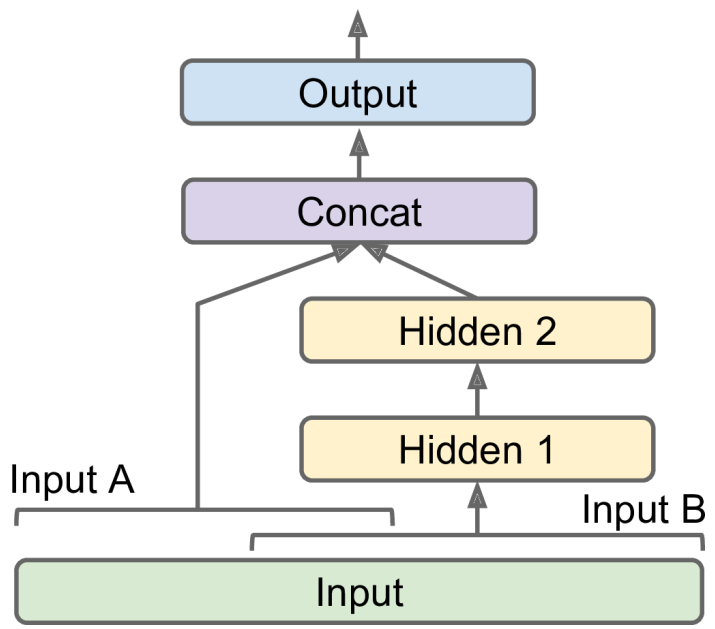

In [23]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

model.compile(loss='mean_squared_error', optimizer='sgd')

In [24]:
X_train_A, X_train_B = X_train_scaled[:,:5], X_train_scaled[:,2:]
X_valid_A, X_valid_B = X_valid_scaled[:,:5], X_valid_scaled[:,2:]
X_test_A, X_test_B = X_test_scaled[:,:5], X_test_scaled[:,2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [25]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.3059 - val_loss: 0.4900
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4405 - val_loss: 0.4631
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4117 - val_loss: 0.4426
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3961 - val_loss: 0.4355
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3942 - val_loss: 0.4263
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3888 - val_loss: 0.4256
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4062 - val_loss: 0.4205
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3835 - val_loss: 0.4193
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3838 - val_loss: 0.4150
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3862 - val_loss: 0.4114

In [26]:
y_pred = model.predict((X_new_A, X_new_B))
print('Actual -')
print(y_test[:3])
print('Prediction -')
print(y_pred)

Actual -
[1.625 0.732 2.681]
Prediction -
[[2.4543786]
 [0.7617775]
 [2.6268427]]


#### Saving keras model

In [ ]:
model.save('CAHousePrice_model.h5')

#### Loading keras model

In [ ]:
model = keras.models.load_model('CAHousePrice_model.h5')

#### Saving model parameters during training using checkpoints (very useful on large datasets)

In [ ]:
## Saving the best model from all the model runs

checkpoint_cb = keras.callbacks.ModelCheckpoint('CAHousePrice_model.h5', save_best_only=True) ## save_best_only saves the best model only
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid), \
                    callbacks=[checkpoint_cb])

## Rollback to the best model
model = keras.models.load_model('CAHousePrice_model.h5')

In [ ]:
## Early stopping if no more improvement on the validation set (save and stop at best model)

checkpoint_cb = keras.callbacks.ModelCheckpoint('CAHousePrice_model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit((X_train_A, X_train_B), y_train, epochs=100, validation_data=((X_valid_A, X_valid_B), y_valid), \
                    callbacks=[checkpoint_cb, early_stopping_cb])

## Rollback to the best model
model = keras.models.load_model('CAHousePrice_model.h5')